In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

#importing the required libraries and more libraries we will need

In [136]:
data = pd.read_csv("insurance.csv")
#reading the provided file

In [137]:
dt = data.copy()
dt.head()
#copying the data set so the actual data stays still and we get to play on the copied one

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [138]:
dt.info()
#seeing the data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


***Examining the distribution of Bmi (Body Mass Index)***

<Axes: title={'center': 'BMI Distribution Histogram'}, ylabel='Frequency'>

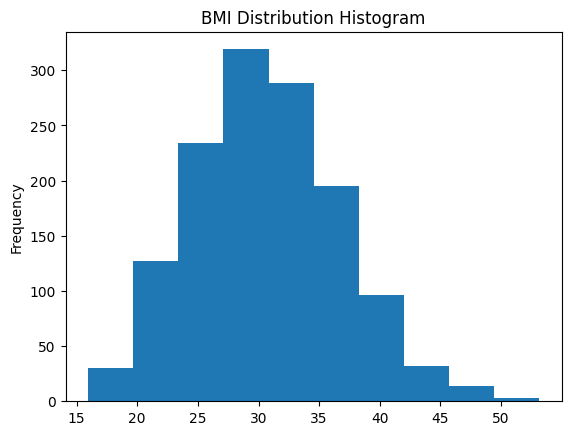

In [139]:
dt["bmi"].plot(kind="hist", title="BMI Distribution Histogram")
#Examining the distribution of BMI (Body Mass Index)

<Axes: title={'center': 'BMI Distribution Density'}, ylabel='Density'>

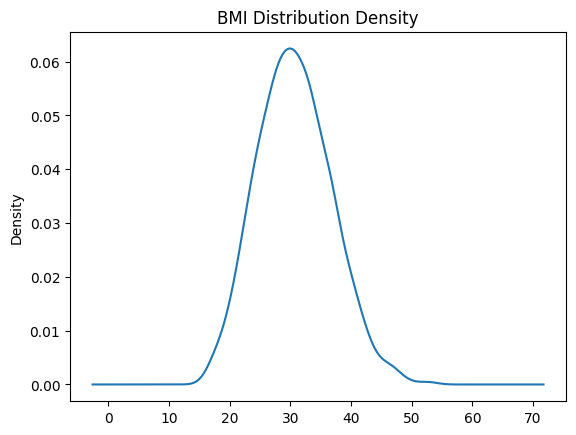

In [140]:
dt["bmi"].plot(kind="density", title="BMI Distribution Density")
#Examining the Density of the BMI, we can understand that the majority of the people are around 30 BMI which is overweight

***Examining the relationship between "smoker" and "charges"***

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


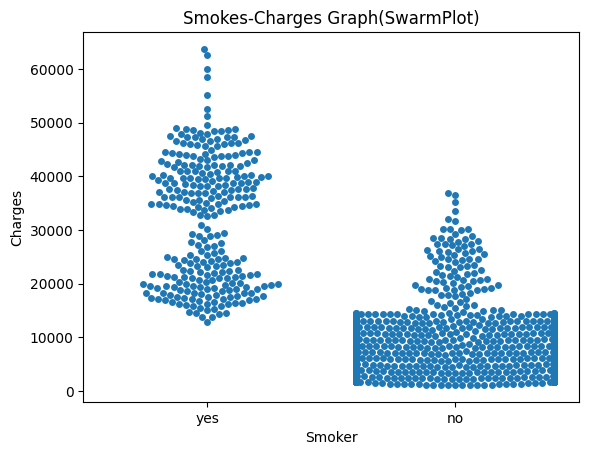

In [141]:
sns.swarmplot(x="smoker", y="charges", data=dt)
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.title("Smokes-Charges Graph(SwarmPlot)")
plt.show()
#Using SwarmPlot to examine the relationship

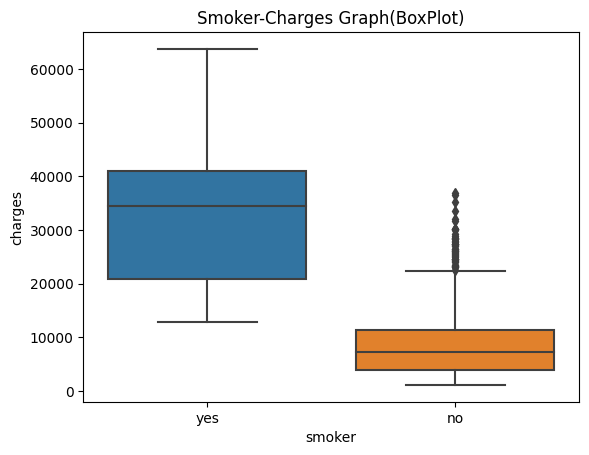

In [142]:
sns.boxplot(x="smoker", y="charges", data=data)
plt.title("Smoker-Charges Graph(BoxPlot)")
plt.show()
#Using BoxPlot to see another examination

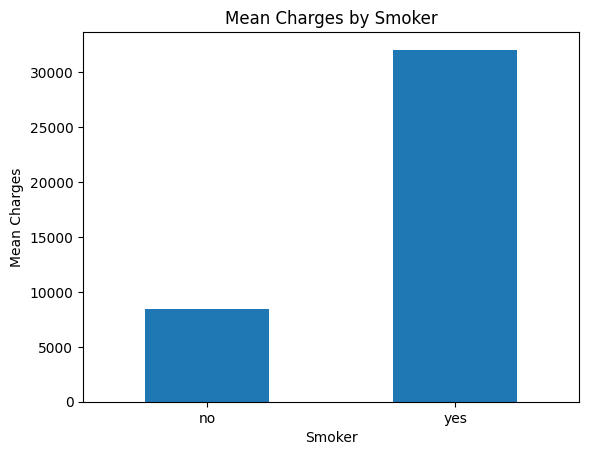

In [143]:
charges_mean = dt.groupby("smoker")["charges"].mean()
charges_mean.plot(kind="bar")
plt.xlabel("Smoker")
plt.ylabel("Mean Charges")
plt.title("Mean Charges by Smoker")
plt.xticks(rotation=360)
plt.show()
#Seeing the mean charges and smoker relationship

We can see that the mean charges increase so much if the person is a smoker.

***Examining the relationship between "smoker" and "region"***

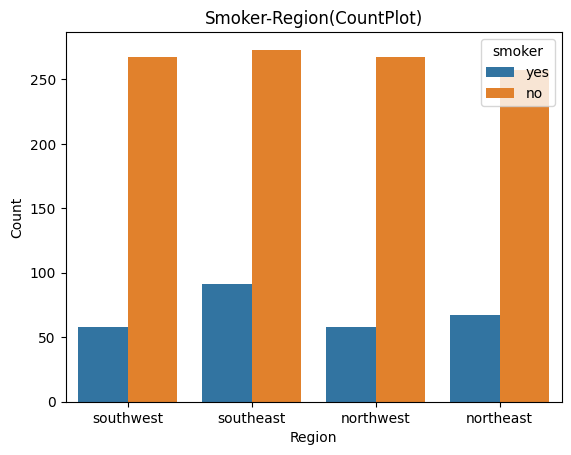

In [144]:
sns.countplot(x="region", hue="smoker", data=dt)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Smoker-Region(CountPlot)")
plt.show()
#Using CountPlot to see the relationship between smokers and regions.

We can see that region is not that effective to smoking but the region with most smokers is "southeast" whereas the region with the least smokers is
"northeast".

***Examining the relationship between "bmi" and "sex"***

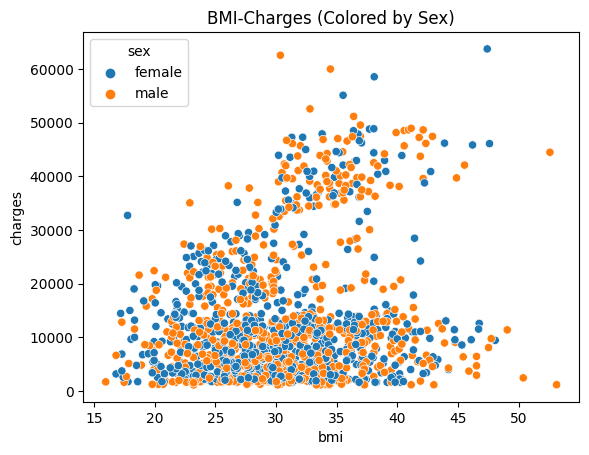

In [145]:
sns.scatterplot(x="bmi", y="charges", hue="sex", data=data)
plt.title("BMI-Charges (Colored by Sex)")
plt.show()
#Using ScatterPlot to see the relationship between BMI and sex using the charge values

Text(0.5, 1.0, 'Mean BMI by Gender')

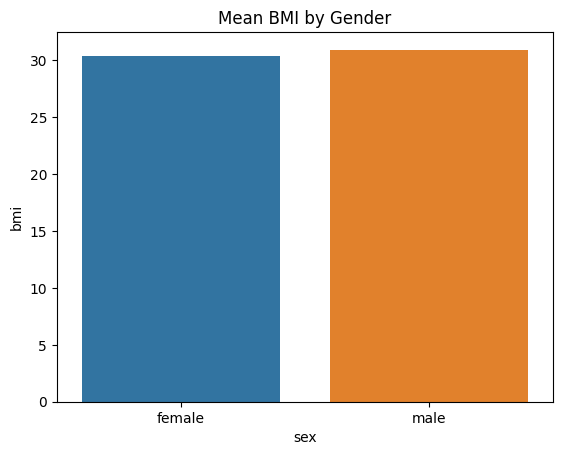

In [146]:
sns.barplot(data=dt, x="sex", y="bmi", estimator="mean", errorbar=None)
plt.title("Mean BMI by Gender")
#Using BarPlot to see the Mean BMI by Gender.

We can see that both male and female Mean BMI's are around 30 but male Mean BMI is slightly more.

***Finding the "region" with the most "children"***

In [147]:
regionvschildren_sum = dt.groupby("region")["children"].sum()
#Calculating the total children per region using .sum()
regionvschildren_max = regionvschildren_sum.idxmax()
#Declaring the max children using idxmax()

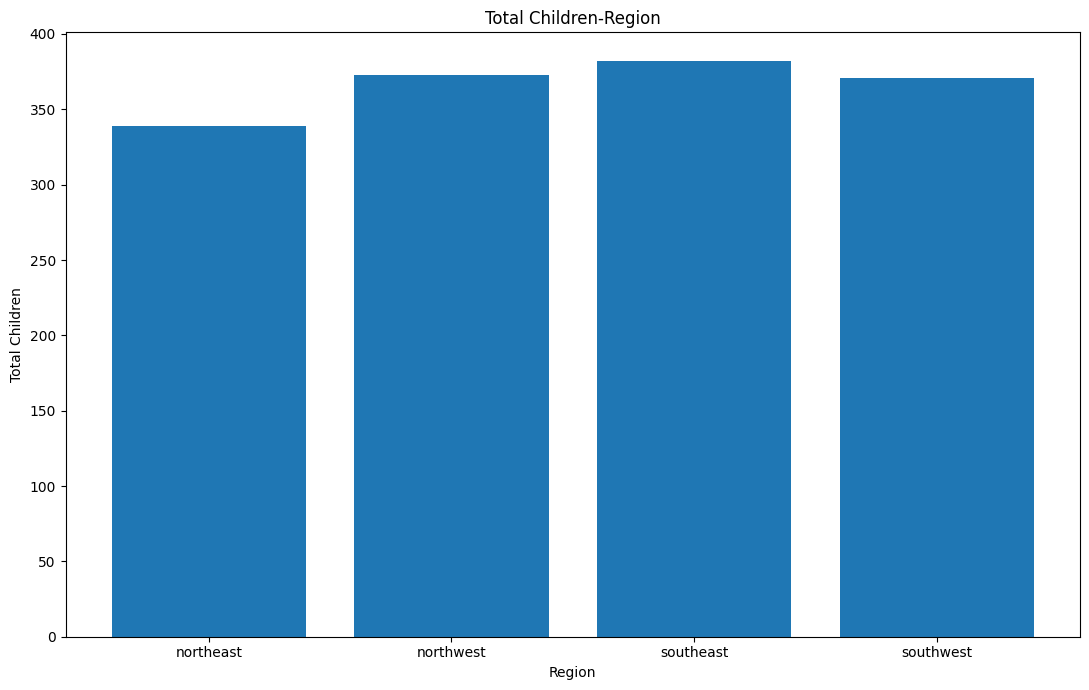

In [148]:
plt.figure(figsize=(11, 7))

plt.bar(regionvschildren_sum.index, regionvschildren_sum.values)
plt.xlabel("Region")
plt.ylabel("Total Children")
plt.title("Total Children-Region")
plt.tight_layout()
plt.show()
#Plotting the Total Children- Region graph

We can see that the region with most children is "southeast" whereas the region with the least children is "northeast".

***Examining the relationship between "age" and "bmi"***

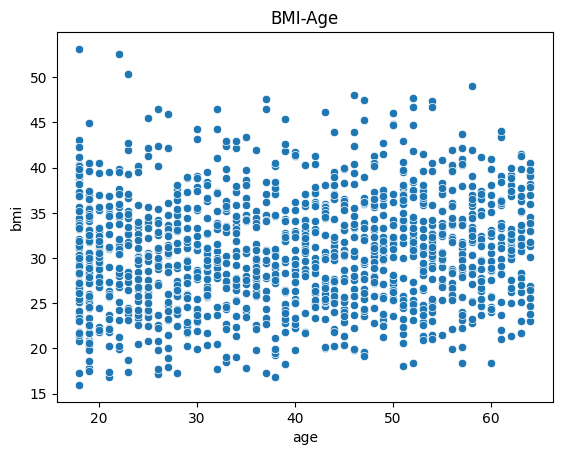

In [149]:
sns.scatterplot(x="age", y="bmi", hue=None, data=data)
plt.title("BMI-Age")
plt.show()
#Using ScatterPlot to examine the relationship

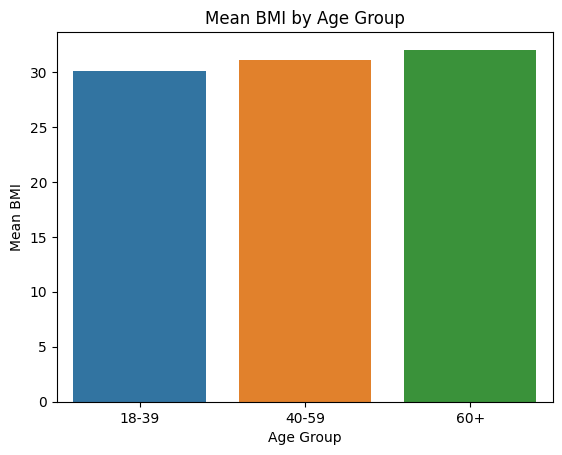

In [150]:
age_bins = [0, 40, 60, 100]
age_labels = ['18-39', '40-59', '60+', ]


dt['age_group'] = pd.cut(dt['age'], bins=age_bins, labels=age_labels, right=False)

#Using BarPlot to see the Mean BMI by Age Group
sns.barplot(x='age_group', y='bmi', data=dt, errorbar=None)
plt.xlabel('Age Group')
plt.ylabel('Mean BMI')
plt.title('Mean BMI by Age Group')
plt.show()

We can see that the Mean BMI is directly proportional with the age groups.

***Examining the relationship between "bmi" and "children"***

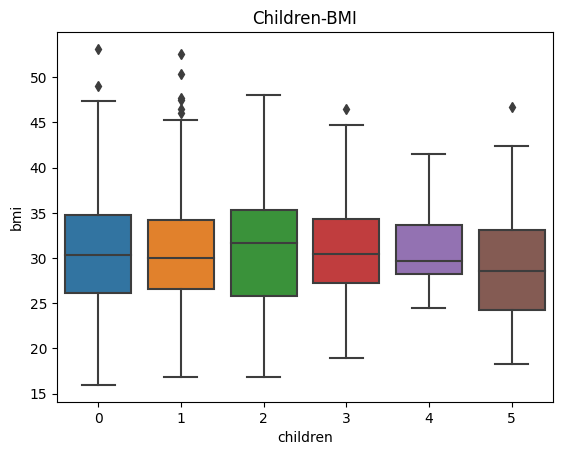

In [151]:
sns.boxplot(x="children", y="bmi", hue=None, data=data)
plt.title("Children-BMI")
plt.show()
#Using BoxPlot to examine the relationship

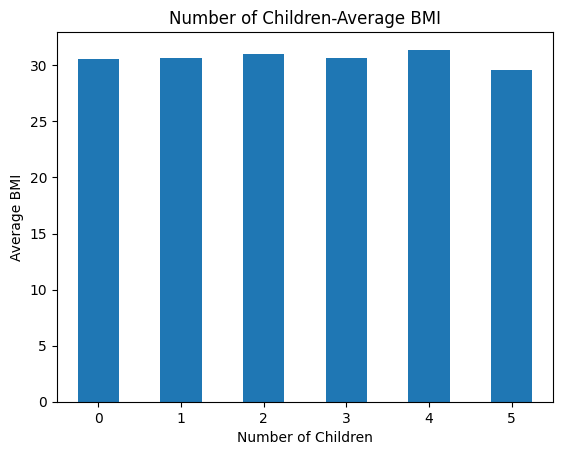

In [152]:
bins = [0, 1, 2, 3, 4, 5, 6]
labels = ["0", "1", "2", "3", "4", "5"]
dt["children_category"] = pd.cut(dt["children"], bins=bins, labels=labels, right=False)

bmi_children = dt.groupby("children_category")["bmi"].mean()
bmi_children.plot(kind="bar")

plt.xlabel("Number of Children")
plt.ylabel("Average BMI")
plt.title("Number of Children-Average BMI")
plt.xticks(rotation=360)
plt.show()
#Using BarPlot to see the Number of Children-Average BMI relationship better.

We can understand that the Average BMI has nothing to do with Number of Children.

***The outlier in the "bmi" variable***

There are various ways to understand if there is an outlier in a dataset. I used two of those ways.

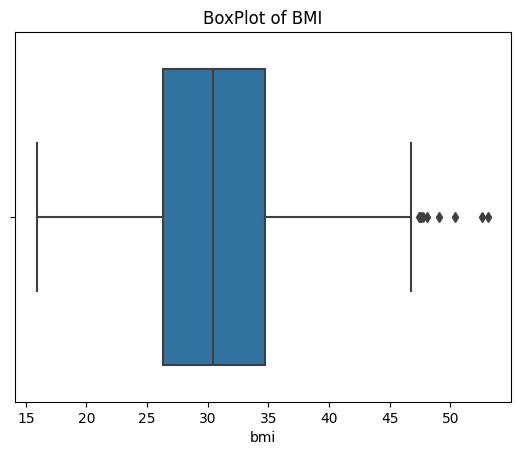

In [153]:
sns.boxplot(x=data["bmi"])
plt.title("BoxPlot of BMI")
plt.show()
#Using BoxPlot

When we use the BoxPlot data to understand if there are any outliers, we can see that there are some values outside the lines, to be specific outside the right lines. We will also use another method to confirm the outliers.

In [154]:
dt.sort_values( by="bmi", ascending=True)

,age,sex,bmi,children,smoker,region,charges,age_group,children_category
172,18,male,15.960,0,no,northeast,1694.79640,18-39,0
428,21,female,16.815,1,no,northeast,3167.45585,18-39,1
1226,38,male,16.815,2,no,northeast,6640.54485,18-39,2
412,26,female,17.195,2,yes,northeast,14455.64405,18-39,2
1286,28,female,17.290,0,no,northeast,3732.62510,18-39,0
...,...,...,...,...,...,...,...,...,...
286,46,female,48.070,2,no,northeast,9432.92530,40-59,2
116,58,male,49.060,0,no,southeast,11381.32540,40-59,0
847,23,male,50.380,1,no,southeast,2438.05520,18-39,1
1047,22,male,52.580,1,yes,southeast,44501.39820,18-39,1


In [155]:
quartiles = dt['bmi'].quantile([0.25, 0.5, 0.75])
quartiles

0.25    26.29625
0.50    30.40000
0.75    34.69375
Name: bmi, dtype: float64

In [156]:
firstquartile = 26.29625
secondquartile = 30.40000
thirdquartile = 34.69375

In [157]:
iqr = thirdquartile - firstquartile
iqr

8.3975

In [158]:
upperfence = thirdquartile + (1.5 * iqr)
lowerfence = firstquartile - (1.5 * iqr)

In [159]:
upperfence

47.290000000000006

In [160]:
lowerfence

13.7

In [161]:
dt.sort_values( by="bmi", ascending=True)

,age,sex,bmi,children,smoker,region,charges,age_group,children_category
172,18,male,15.960,0,no,northeast,1694.79640,18-39,0
428,21,female,16.815,1,no,northeast,3167.45585,18-39,1
1226,38,male,16.815,2,no,northeast,6640.54485,18-39,2
412,26,female,17.195,2,yes,northeast,14455.64405,18-39,2
1286,28,female,17.290,0,no,northeast,3732.62510,18-39,0
...,...,...,...,...,...,...,...,...,...
286,46,female,48.070,2,no,northeast,9432.92530,40-59,2
116,58,male,49.060,0,no,southeast,11381.32540,40-59,0
847,23,male,50.380,1,no,southeast,2438.05520,18-39,1
1047,22,male,52.580,1,yes,southeast,44501.39820,18-39,1


When we apply the quartile method and use the calculated upper and lower fence values we can see that the last bits of the bmi data are outliers.

***Examining the relationship between "bmi" and "charges"***


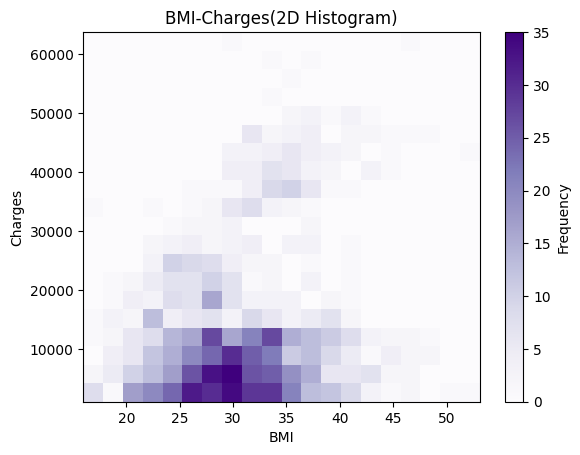

In [162]:
plt.hist2d(data=dt, x="bmi", y="charges", bins=(20, 20), cmap="Purples")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI-Charges(2D Histogram)")
plt.colorbar(label="Frequency")
plt.show()
#Using 2D Histogram to understand the relationship between BMI and Charges

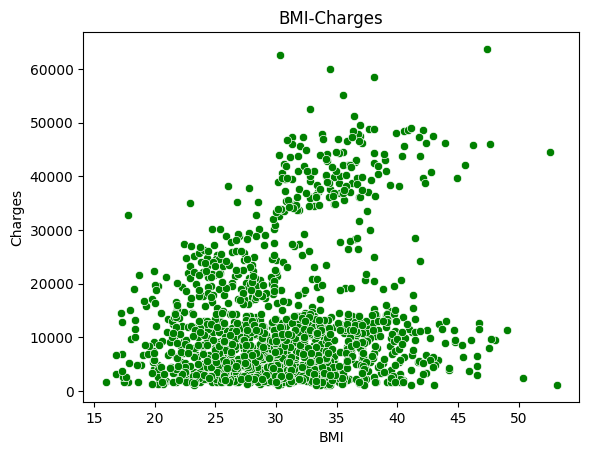

In [163]:
sns.scatterplot(data=dt, x="bmi", y="charges", c = 'green')
plt.title("BMI-Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()
#Using ScatterPlot to have another point of view


We can see that generally the charges are between 0 and 20000. We can not really comment to the relationship between the BMI and Charges.

***Examining the relationship between "region", "smoker" and "bmi" using BarPlot***

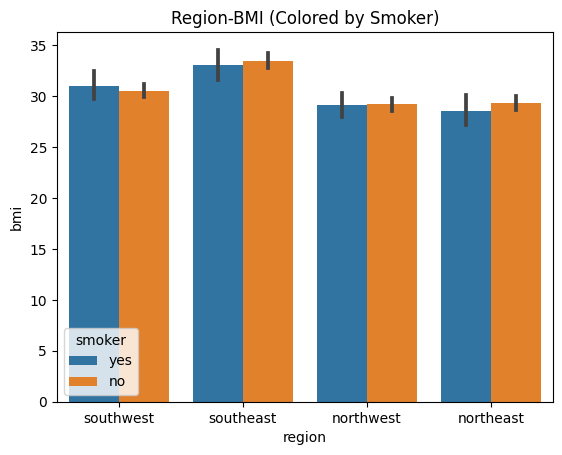

In [164]:
sns.barplot(x="region", y="bmi", hue="smoker", data=data, )
plt.title("Region-BMI (Colored by Smoker)")
plt.show()

We can see that the region with the most BMI value is "southeast" and the region with the least BMI value is "northeast"

***Data Preprocessing***

In [165]:
le = LabelEncoder()
data["sex"] = le.fit_transform(data["sex"])
data["smoker"] = le.fit_transform(data["smoker"])
#Using Label Encoding for the "sex" and "smoker" columns

In [166]:
data = pd.get_dummies(data, columns=["region"], drop_first=True)
#Using One-Hot encoding for the "region" column and changing the columns.

In [167]:
X = data.drop("charges", axis=1)
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
#Splitting and training the data using train_test_split

In [168]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Using StandardScaler to scale the dataset.

In [169]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


***Model Selection***

In [170]:
linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
Rand_forest = RandomForestRegressor()
SVM = SVR()
#Selecting several regression models

In [171]:
linreg_scores = cross_val_score(linreg,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)
#Using cross validation to calculate the Linear Regression score.

In [172]:
linreg_scores

array([-36893475.66639377, -43307871.90469334, -27392943.33594104,
       -36545076.53517248, -34064321.21101739, -37545462.85261899,
       -53014180.37182803, -39961704.41522814, -38357145.09175087,
       -31776479.23374396])

In [173]:
DecTree_scores = cross_val_score(DecTree,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)
#Using cross validation to calculate the Decision Tree score.

In [174]:
Rand_forest_scores = cross_val_score(Rand_forest,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)
#Using cross validation to calculate the Random Forest score.

In [175]:
svm_scores = cross_val_score(SVM,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)
#Using cross validation to calculate the Support Vector Regression score.

In [176]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores:{scores},
  Mean: {scores.mean()},
  Standart Deviation: {scores.std()}
  """)
  #Declaring the score_display function which shows the scores of given regression models

In [177]:
score_display(linreg_scores)


  RMSE Scores:[6073.99997254 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7281.08373608 6321.52706355 6193.3145481  5637.06299714],
  Mean: 6133.0839262055,
  Standart Deviation: 520.7183652979131
  


In [178]:
score_display(DecTree_scores)


  RMSE Scores:[6898.57320233 7423.17747337 6913.2312234  6554.10087573 7544.13377529
 5953.98186642 7594.83025221 6995.57880017 6463.78601088 5730.12046686],
  Mean: 6807.151394667669,
  Standart Deviation: 605.6412404233828
  


In [192]:
score_display(Rand_forest_scores)


  RMSE Scores:[4748.05446812 5302.43940911 3870.84605276 4625.72168855 5420.21074418
 4871.7289885  5704.83686249 5323.02850138 5189.00061318 4812.56145325],
  Mean: 4986.842878151916,
  Standart Deviation: 493.2864601425163
  


In [193]:
score_display(svm_scores)


  RMSE Scores:[12545.64518915 12492.46797861 12837.14644625 14521.41472828
 13015.64896514 10432.10965631 12341.23854622 12172.18226514
 12952.20823726 12270.31665721],
  Mean: 12558.03786695775,
  Standart Deviation: 953.9508492380529
  


We can see that the best performing model is the Random Forest model.

***Hyper-parameter Optimization***

In [194]:
params = {"n_estimators": [3, 10, 20, 50],
          "n_jobs": [2, 3, 4, 10]}


In [195]:
grid_s = GridSearchCV(Rand_forest, params, cv=5, scoring="neg_mean_squared_error")

In [196]:
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [3, 10, 20, 50],
                         'n_jobs': [2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [197]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 3}

In [198]:
for mean_score, params in zip((grid_s.cv_results_['mean_test_score']), grid_s.cv_results_["params"]):
  print(np.sqrt(-mean_score), "------------", params)

5567.1517662632505 ------------ {'n_estimators': 3, 'n_jobs': 2}
5660.658809368305 ------------ {'n_estimators': 3, 'n_jobs': 3}
5635.909051945147 ------------ {'n_estimators': 3, 'n_jobs': 4}
5681.364641525257 ------------ {'n_estimators': 3, 'n_jobs': 10}
5236.124229918976 ------------ {'n_estimators': 10, 'n_jobs': 2}
5292.024818483575 ------------ {'n_estimators': 10, 'n_jobs': 3}
5207.15915645035 ------------ {'n_estimators': 10, 'n_jobs': 4}
5158.57769403126 ------------ {'n_estimators': 10, 'n_jobs': 10}
5069.962414404944 ------------ {'n_estimators': 20, 'n_jobs': 2}
5055.306966144245 ------------ {'n_estimators': 20, 'n_jobs': 3}
5072.9902036706435 ------------ {'n_estimators': 20, 'n_jobs': 4}
5102.808452761269 ------------ {'n_estimators': 20, 'n_jobs': 10}
5024.265986582434 ------------ {'n_estimators': 50, 'n_jobs': 2}
5016.492217224325 ------------ {'n_estimators': 50, 'n_jobs': 3}
5022.901940687652 ------------ {'n_estimators': 50, 'n_jobs': 4}
5029.580863225422 --------

In [199]:
prediction = grid_s.best_estimator_.predict(X_test)

In [200]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [201]:
comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                         "Predictions": prediction[0:10]})
#Comparing the y values through 0 to 10 to the predictions values  through 0 to 10.

In [202]:
comparison

,Y Test,Predictions
0,9095.06825,10946.179305
1,5272.17580,5091.258073
2,29330.98315,28364.632104
3,9301.89355,11716.537239
4,33750.29180,34859.701761
5,4536.25900,9264.059588
6,2117.33885,2127.625647
7,14210.53595,14972.477465
8,3732.62510,5621.962065
9,10264.44210,10108.009827


***Model Evaluation***

In [203]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR-Squared Value: {r_squared}")

In [207]:
regression_evaluation(prediction)

Mean Absolute Error: 2675.882655544216 
Mean Squared Error: 21630102.85300642 
Root Mean Squared Error: 4650.817439225756 
R-Squared Value: 0.8606745276102138


We can see that we did a good job with a score of 0.8606 but of course the model can be improved so much.